<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Metodo_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Una nota sobre la generación de variables aleatorias normales

**G. E. P. Box y Mervin E. Muller**  
*The Annals of Mathematical Statistics*, Vol. 29, No. 2 (1958), pp. 610–611

## Resumen

Se presenta un método para generar variables aleatorias independientes con distribución normal estándar (media cero y varianza unitaria) a partir de variables aleatorias uniformemente distribuidas en el intervalo (0,1).

## Introducción

En muchas aplicaciones estadísticas y simulaciones, es necesario generar variables aleatorias con distribución normal. Aunque existen varios métodos para este propósito, algunos pueden ser computacionalmente ineficientes o complejos. Aquí se presenta un método sencillo y eficiente para generar pares de variables aleatorias independientes con distribución normal estándar utilizando variables aleatorias uniformes.

## Método

Sean $U_1$ y $U_2$ dos variables aleatorias independientes, cada una uniformemente distribuida en el intervalo (0,1). Definimos:

$$
Z_1 = \sqrt{-2 \ln U_1} \cdot \cos(2\pi U_2)
$$
$$
Z_2 = \sqrt{-2 \ln U_1} \cdot \sin(2\pi U_2)
$$

Entonces, $Z_1$ y $Z_2$ son variables aleatorias independientes con distribución normal estándar.

## Justificación

Este resultado se basa en la transformación de coordenadas polares. La densidad conjunta de dos variables aleatorias independientes con distribución normal estándar es:

$$
f(x, y) = \frac{1}{2\pi} e^{-(x^2 + y^2)/2}
$$

Al transformar a coordenadas polares, con \( x = r \cos \theta \) y \( y = r \sin \theta \), la densidad conjunta se convierte en:

$$
f(r, \theta) = \frac{1}{2\pi} e^{-r^2/2} \cdot r
$$

La función de densidad marginal de \( r \) es:

$$
f(r) = r e^{-r^2/2}, \quad r \geq 0
$$

La función de distribución acumulada (CDF) de \( r \) es:

$$
F(r) = \int_0^r s e^{-s^2/2} \, ds = 1 - e^{-r^2/2}
$$

Por lo tanto, si $U_1$ es uniforme en (0,1), entonces $r = \sqrt{-2 \ln U_1}$ tiene la distribución deseada. Además, si $U_2$ es uniforme en (0,1), entonces $\theta = 2\pi U_2$ es uniforme en el intervalo (0, 2π). Así, al definir:

$$
Z_1 = \sqrt{-2 \ln U_1} \cdot \cos(2\pi U_2)
$$
$$
Z_2 = \sqrt{-2 \ln U_1} \cdot \sin(2\pi U_2)
$$

obtenemos dos variables aleatorias independientes con distribución normal estándar.

## Implementación

Este método es computacionalmente eficiente y fácil de implementar. Requiere la generación de dos variables aleatorias uniformes y el cálculo de funciones logarítmicas, seno y coseno. Es especialmente útil en simulaciones donde se necesitan múltiples variables aleatorias normales.

## Conclusión

Se ha presentado un método sencillo y eficiente para generar pares de variables aleatorias independientes con distribución normal estándar a partir de variables aleatorias uniformes. Este método es útil en diversas aplicaciones estadísticas y simulaciones.


In [14]:
# importando las librerias necesarias para generar numeros aleatorios
# y graficar el histograma
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.stats import norm

In [2]:
# Definiendo la funcion para el Metodo de Box Muller
def BMuller(n):
  lista = []
  # se declara el ciclo for para generar el par de numeros aleatorios
  # y hacer las operaciones necesarias con estos numeros para retornar
  # los valores de x e y n-veces
  for _ in range(n):
    # Se generan los numeros aleatorios
    u1 = random()
    u2 = random()
    # Se asignan a R y \theta los valores de las operaciones con
    # los numeros aleatorios generados, mediante el uso de las
    # formulas del metodo
    R = np.sqrt(-2*np.log(u1))
    theta = 2*np.pi*u2
    # Se calculan del mismo modo los valores de x e y
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    # Se agregan los valores de x e y a la lista
    lista.append(x)
    lista.append(y)

  return lista

In [21]:
# Repitiendo 100,000 veces el experimento
k = 100000
var = BMuller(k)

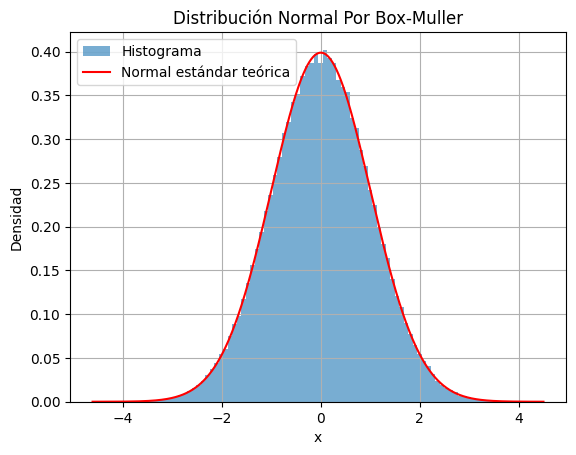

In [22]:
# Graficar histograma y función teórica
plt.hist(var, bins=100, density=True, alpha=0.6, label='Histograma')

# Generar valores para el eje x dentro del rango de los datos
x = np.linspace(min(var), max(var), 1000)

# Calcular la función de densidad normal teórica
pdf = norm.pdf(x, loc=0, scale=1)  # media=0, desviación estándar=1

# Dibujar la curva teórica
plt.plot(x, pdf, 'r-', label='Normal estándar teórica')
plt.title("Distribución Normal Por Box-Muller")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Con la lista almacenada en la variable d
# se calcula el valor aproximado de la media y la varianza
print("Media aproximada: ", np.mean(var))
print("Varianza aproximada: ", np.var(var))
print("Desviacion estandar aproximada: ", np.std(var))

Media aproximada:  -0.009541024543162194
Varianza aproximada:  1.0054571521126945
Desviacion estandar aproximada:  1.0027248636154857


In [18]:
mu = 0
sigma = 1

# Se calcula la exactitud de los calculos hechos mediante
# la simulacion contra los calculos hechos analiticamente
E_abs_med = abs(np.mean(var)-mu)
E_abs_var = abs(np.var(var)-sigma**2)
E_absa_des = abs(np.std(var)-sigma)

In [20]:
print("El error absoluto de la media son: ", E_abs_med)

print("\nEl error absoluto de la varianza son: ", E_abs_var)

print("\nEl error absoluto de la desviacion estandar son: ", E_absa_des)


El error absoluto de la media son:  0.009541024543162194

El error absoluto de la varianza son:  0.0054571521126944855

El error absoluto de la desviacion estandar son:  0.0027248636154857397
